In [58]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [40]:
dataset = pd.read_csv('/Users/frank.mancuso/Desktop/datasets/Height_Weight_single_variable_data_101_series_1.0.csv')

In [41]:
dataset.head()

,Weight,Height
0,28.0,121.92
1,28.1,124.46
2,28.2,127.00
3,28.3,129.54
4,28.4,132.08


In [42]:
X = dataset.iloc[:,1].values.reshape(-1,1)
y = dataset.iloc[:,0].values.reshape(-1,1)

In [43]:
#check for null values
dataset.isnull().any()

Weight    False
Height    False
dtype: bool

In [44]:
#split dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [45]:
#fitting the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
#calculate R square and correlation
print('R square = ', regressor.score(X_train,y_train))

print('Correlation =',math.sqrt(regressor.score(X_train,y_train)))


('R square = ', 0.9943861120296072)
('Correlation =', 0.99718910545072)


In [47]:
print(regressor.coef_)

[[0.95876933]]


In [55]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Acutal': y_test.flatten(), 'Predicted':y_pred.flatten()})
print(df)

   Acutal  Predicted
0    92.5  92.120386
1    69.8  70.202919
2    59.9  60.461822
3    89.8  89.685112
4    74.8  75.073467
5    57.6  58.026548
6    44.9  45.850178


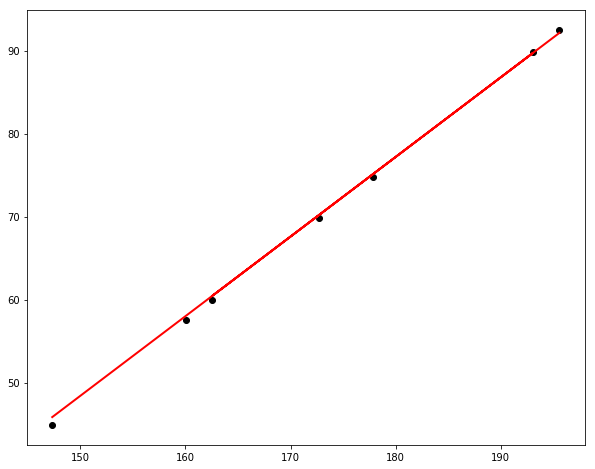

In [56]:
plt.figure(figsize=(10,8))
plt.scatter(X_test,y_test,c='black')
plt.plot(X_test,y_pred,c='red',linewidth=2)
plt.show()

In [59]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

('Mean Absolute Error:', 0.4442052461678695)


In [60]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))

('Mean Squared Error:', 0.2564085037808142)


In [61]:
print('Root Mean Square Error:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

('Root Mean Square Error:', 0.6664872438148156)
